In [6]:
import sqlite3
conn  = sqlite3.connect("Elevate_lab_task7")
cur =  conn.cursor()

In [7]:
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

conn.commit()
print("Sales table created successfully!")

Sales table created successfully!


In [8]:
sample_data = [
    ("Laptop", 4, 60000),
    ("Laptop", 3, 62000),
    ("Mouse", 10, 500),
    ("Mouse", 6, 550),
    ("Keyboard", 5, 1500),
    ("Keyboard", 4, 1600),
    ("Mobile",5,22000),
    ("Printer",6,6000),
    ("Printer",5,5000),
]

cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

print("Sample sales data inserted!")


Sample sales data inserted!


In [9]:
cur.execute("SELECT * FROM sales")
rows = cur.fetchall()
rows

[(1, 'Laptop', 4, 60000.0),
 (2, 'Laptop', 3, 62000.0),
 (3, 'Mouse', 10, 500.0),
 (4, 'Mouse', 6, 550.0),
 (5, 'Keyboard', 5, 1500.0),
 (6, 'Keyboard', 4, 1600.0),
 (7, 'Mobile', 5, 22000.0),
 (8, 'Printer', 6, 6000.0),
 (9, 'Printer', 5, 5000.0)]

In [49]:
cur.execute("SELECT SUM(price) as Total_Sales FROM sales")
rows = cur.fetchall()
rows

[(159150.0,)]

In [51]:
cur.execute("SELECT ROUND(AVG(price),2) as Average_Sales_value FROM sales")
rows = cur.fetchall()
rows

[(17683.33,)]

In [46]:
cur.execute("""SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS
 revenue FROM sales GROUP BY product""")
rows = cur.fetchall()
rows

[('Keyboard', 9, 13900.0),
 ('Laptop', 7, 426000.0),
 ('Mobile', 5, 110000.0),
 ('Mouse', 16, 8300.0),
 ('Printer', 11, 61000.0)]

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_sql_query("SELECT * FROM sales",conn)
df

,id,product,quantity,price
0,1,Laptop,4,60000.0
1,2,Laptop,3,62000.0
2,3,Mouse,10,500.0
3,4,Mouse,6,550.0
4,5,Keyboard,5,1500.0
5,6,Keyboard,4,1600.0
6,7,Mobile,5,22000.0
7,8,Printer,6,6000.0
8,9,Printer,5,5000.0


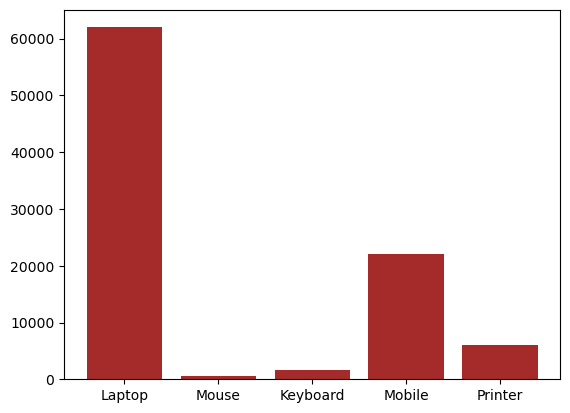

<Figure size 640x480 with 0 Axes>

In [47]:
plt.bar(df["product"],df["price"],color="brown")
plt.show()
plt.savefig("Sales_chart.png")